# Tesla Stock Price Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from matplotlib import style
style.use("fivethirtyeight")

## Importing Dataset

In [2]:
df = pd.read_csv(r"tesla.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


## Data Exploratory

In [6]:
# Selecting the features required
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_perc"] = (df["Close"]-df["Open"]) / df["Open"] * 100

In [7]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [8]:
dates

array(['6/29/2010', '6/30/2010', '7/1/2010', ..., '1/31/2017', '2/1/2017',
       '2/2/2017'], dtype=object)

In [9]:
df = df[["HL_Perc", "CO_perc", "Adj Close", "Volume"]]

In [10]:
# Define the label column
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df.tail()

,HL_Perc,CO_perc,Adj Close,Volume,PriceNextMonth
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


In [12]:
df.head()

,HL_Perc,CO_perc,Adj Close,Volume,PriceNextMonth
0,42.531349,25.736837,23.889999,18766300,17.900000
1,30.557946,-7.599848,23.830000,17187100,17.600000
2,27.873705,-12.160004,21.959999,8218800,18.320000
3,23.463395,-16.521735,19.200001,5139800,18.780001
4,26.342388,-19.449995,16.110001,6866900,19.150000


## Model Building

In [13]:
# Making Features & Label Arrays
X = np.array(df.drop(["PriceNextMonth"],1))
X = preprocessing.scale(X)
X_check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
# Divide the data into training data & testing data
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [15]:
# Define the Random Forest Model
model = RandomForestRegressor()

In [16]:
# Fit the model using the training date
model.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
print("Accuracy :", model.score(X_test, y_test))

Accuracy : 0.9581416999145506


In [18]:
# Fit the Model again using the whole dataset
model.fit(X, y)

RandomForestRegressor()

In [19]:
predictions = model.predict(X_check)

In [20]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

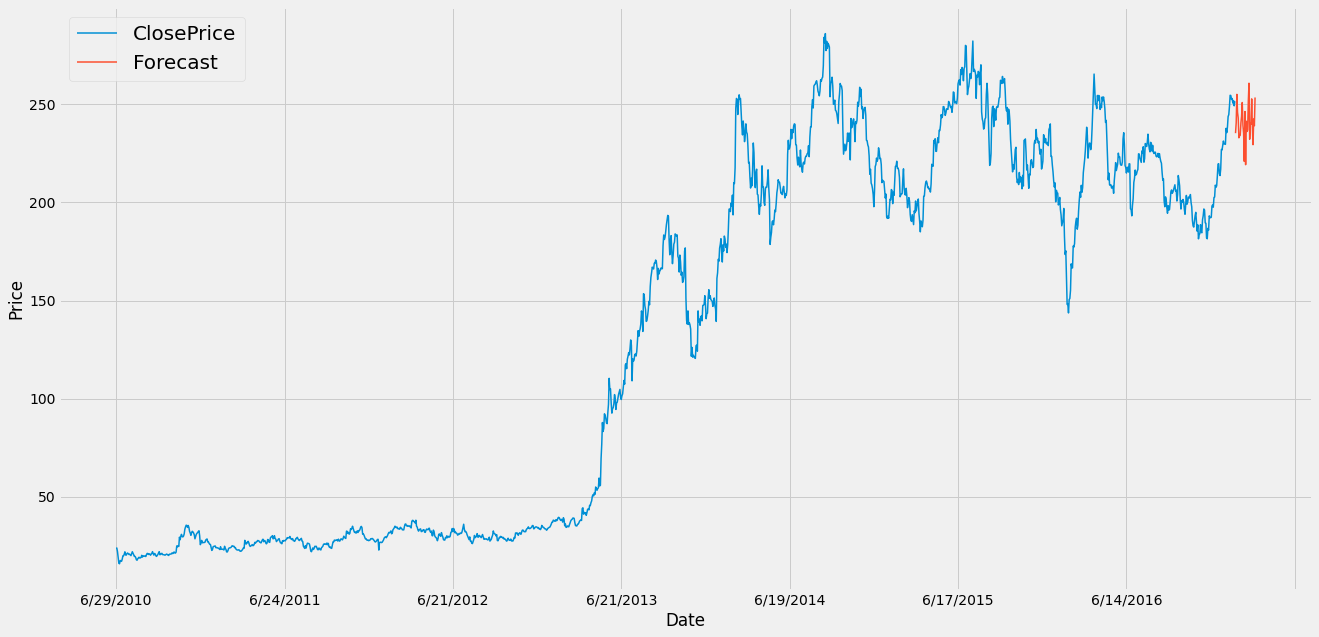

In [21]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

## Deep Learning Prediction Using RNN

In [22]:
dataset_train = pd.read_csv('tesla.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [23]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [24]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [25]:
dataset_train['Date'] = pd.to_datetime(dataset_train['Date'])
dataset_train.set_index('Date',inplace=True)

In [26]:
dataset_train.shape

(1692, 6)

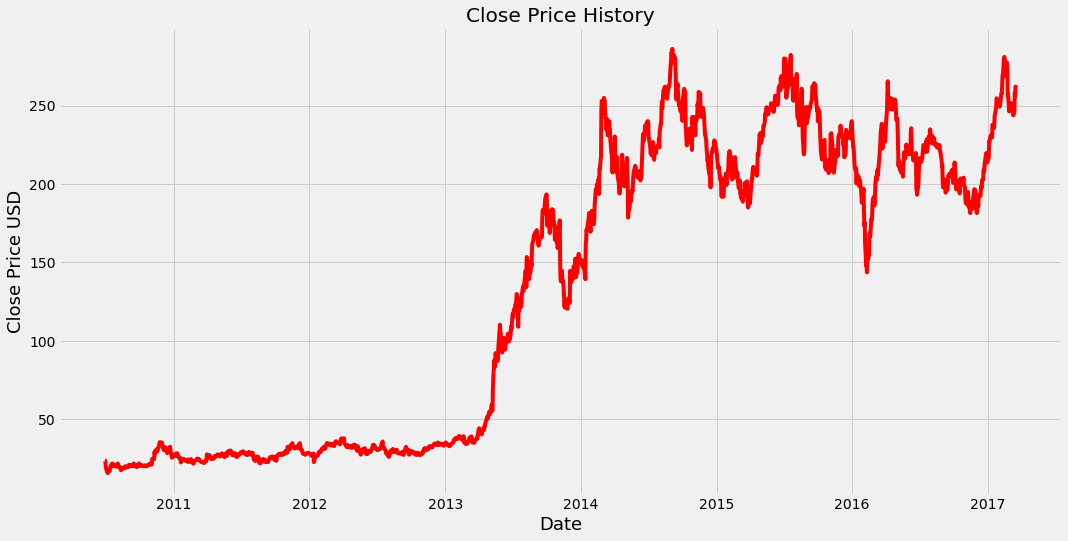

In [27]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset_train['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [28]:
# create a new data frame with only 'Close column'
import math
data = dataset_train.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

1354

In [29]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [30]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [31]:
#convert the x_train and y_train  to numpy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [32]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [38]:
# Importing Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout # This is essential to add some dropout regularization

In [40]:
#Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [41]:
#Complie the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
#Train the model
regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
41/41 [==============================] - 17s 150ms/step - loss: 0.0326
Epoch 2/50
41/41 [==============================] - 6s 135ms/step - loss: 0.0065
Epoch 3/50
41/41 [==============================] - 5s 134ms/step - loss: 0.0053
Epoch 4/50
41/41 [==============================] - 6s 159ms/step - loss: 0.0051
Epoch 5/50
41/41 [==============================] - 6s 136ms/step - loss: 0.0047
Epoch 6/50
41/41 [==============================] - 5s 133ms/step - loss: 0.0047
Epoch 7/50
41/41 [==============================] - 5s 134ms/step - loss: 0.0041
Epoch 8/50
41/41 [==============================] - 5s 133ms/step - loss: 0.0044
Epoch 9/50
41/41 [==============================] - 5s 133ms/step - loss: 0.0038
Epoch 10/50
41/41 [==============================] - 5s 133ms/step - loss: 0.0040
Epoch 11/50
41/41 [==============================] - 7s 160ms/step - loss: 0.0041
Epoch 12/50
41/41 [==============================] - 5s 133ms/step - loss: 0.0038
Epoch 13/50
41/41 [=====

In [43]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [44]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [45]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [46]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [47]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.241089863555729

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


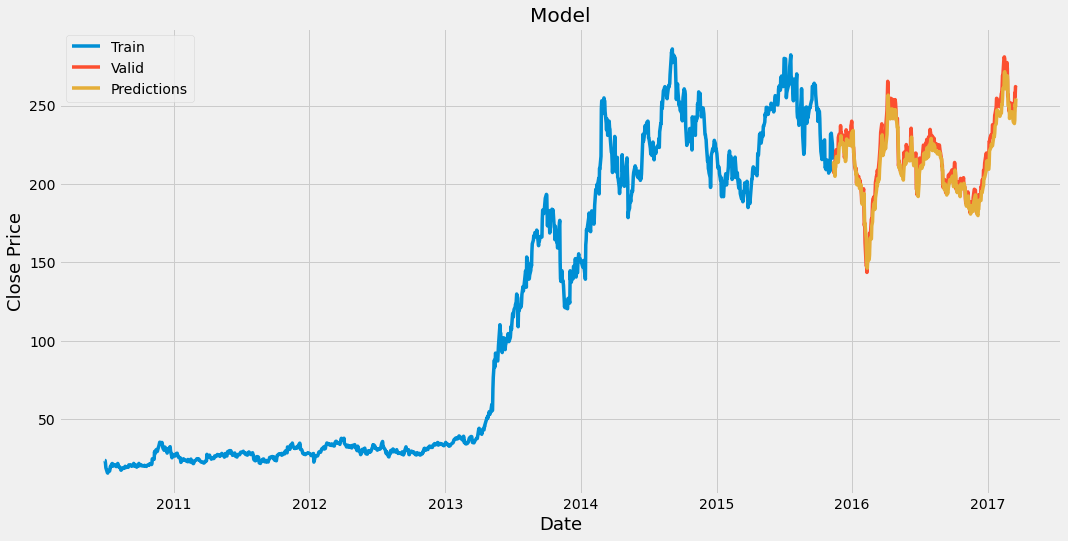

In [48]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [49]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,214.463638
2015-11-13,207.190002,209.973068
2015-11-16,214.309998,204.910034
2015-11-17,214.000000,210.361267
2015-11-18,221.070007,210.825836
...,...,...
2017-03-13,246.169998,238.520340
2017-03-14,258.000000,240.631882
2017-03-15,255.729996,251.069702
